In [8]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#### 1)	在2.1数据操作章节中，Tensor数据x, y分别如图1(a)和图1(b)所示，利用逻辑运算符，编程找出x, y中对应位置不相同的元素，并输出这些元素的位置坐标。

In [9]:
x = torch.tensor([[2,1,4,3],
                 [1,2,3,4],
                 [4,3,2,1]])
y = torch.tensor([[2,1,2,3],
                 [0,2,3,1],
                 [4,3,4,1]])
res = (x != y)
# 此时不相等处为True
res

tensor([[False, False,  True, False],
        [ True, False, False,  True],
        [False, False,  True, False]])

In [10]:
# res == True 返回不相等位置的索引
index_1 = (res == True)
index_2 = (res == False)
print(index_1)
print(x[index_1])
print(index_2)
print(x[index_2])

tensor([[False, False,  True, False],
        [ True, False, False,  True],
        [False, False,  True, False]])
tensor([4, 1, 4, 2])
tensor([[ True,  True, False,  True],
        [False,  True,  True, False],
        [ True,  True, False,  True]])
tensor([2, 1, 3, 2, 3, 4, 3, 1])


#####  输出格式调整

In [11]:
res = (x != y)
# 打印出x和y中不相等的元素
print(x[res == True])
print(y[res == True])
# 打印出不相等位置的索引
print(np.nonzero(res))

# for循环实现
for i in range(list(res.shape)[0]):
    for j in range(list(res.shape)[1]):
        if res[i][j] == True:
            print(f'[{i},{j}]')

tensor([4, 1, 4, 2])
tensor([2, 0, 1, 4])
tensor([[0, 2],
        [1, 0],
        [1, 3],
        [2, 2]])
[0,2]
[1,0]
[1,3]
[2,2]


#### 2)	如图2所示三组不同维度的tensor，请在代码中验证，是否都可以通过广播机制进行相加运算，如果不可以，请解释为什么？

In [12]:
# 第一组
arr1 = torch.tensor([[1,2,3,2,1,4],[5,6,1,2,3,1]])
arr2 = torch.tensor([[1],[3]])
print(arr1.shape, arr2.shape)
print(arr1 + arr2)

torch.Size([2, 6]) torch.Size([2, 1])
tensor([[2, 3, 4, 3, 2, 5],
        [8, 9, 4, 5, 6, 4]])


In [13]:
# 第二组
arr1 = torch.tensor([[1],[2]])
arr2 = torch.tensor([[[2,1,5],[2,1,5]],[[4,5,6],[4,5,6]],[[7,8,9],[7,8,9]]])
print(arr1.shape, arr2.shape)
print(arr1 + arr2)

torch.Size([2, 1]) torch.Size([3, 2, 3])
tensor([[[ 3,  2,  6],
         [ 4,  3,  7]],

        [[ 5,  6,  7],
         [ 6,  7,  8]],

        [[ 8,  9, 10],
         [ 9, 10, 11]]])


In [21]:
# 第三组
arr1 = torch.tensor([[1],[2]])
arr2 = torch.tensor([[[2,1,5],[2,1,5],[2,1,5]],[[4,5,6],[4,5,6],[4,5,6]],[[7,8,9],[7,8,9],[7,8,9]]])
print(arr1.shape, arr2.shape)
print(arr1 + arr2)

torch.Size([2, 1]) torch.Size([3, 3, 3])


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

##### 原因：在张量分向量不同时，不同的分量中，有一个需要为1,此处虽然arr1有一个维度为1，但是其第二个维度为2，与arr2中的对应维度（且该对应维度不为1）不匹配，所以无法广播相加

#### 3)	根据提供的csv数据集，删除缺失值最多的列，并将其他列的缺失项设置为0，最后将预处理后的数据集转换为张量格式。

In [15]:
df1 = pd.read_csv('./data/house_tiny_na.csv')
df1

,NumRooms,Alley,MSSubClass,Price
0,NaN,Pave,60.0,127500
1,2.0,NaN,20.0,106000
2,4.0,NaN,NaN,178100
3,NaN,NaN,70.0,140000


In [24]:
df1 = pd.read_csv('./data/house_tiny_na.csv')

# 统计各列缺失值的个数
col_nan_sum = df1.isna().sum(0)

# 删除缺失值最多的那一列
df2 = df1.drop(columns=[col_nan_sum.idxmax()])

# 将其他列的缺失值设置为0
df3 = df2.fillna(0)
print(df3)
# 将df3转换为张量格式
features = torch.tensor(df3.values)
features

   NumRooms  MSSubClass   Price
0       0.0        60.0  127500
1       2.0        20.0  106000
2       4.0         0.0  178100
3       0.0        70.0  140000


tensor([[0.0000e+00, 6.0000e+01, 1.2750e+05],
        [2.0000e+00, 2.0000e+01, 1.0600e+05],
        [4.0000e+00, 0.0000e+00, 1.7810e+05],
        [0.0000e+00, 7.0000e+01, 1.4000e+05]], dtype=torch.float64)

#### 4)	想要对矩阵A按行进行归一化，运行A/A.sum(axis=1)，看看会发生什么，你能分析原因吗？怎样对这行代码进行改进，以完成按行归一化，改进的理由是什么？

In [26]:
# 按行归一化
A = torch.tensor([[1,2,3],[4,5,6]])
print(A.sum(axis=1))
print(A.sum(axis=1,keepdims=True))

A/A.sum(axis=1,keepdims=True) # keepdims=True保持二维结构

tensor([ 6, 15])
tensor([[ 6],
        [15]])


tensor([[0.1667, 0.3333, 0.5000],
        [0.2667, 0.3333, 0.4000]])

##### 理由：A/A.sum(axis=1, keepdims=True) 保持了原始数组的二维结构，而 A.sum(axis=1) 得到的是一维数组，无法直接用于归一化操作。

#### 5）在同一绘图中同时绘制函数f(x)=lnx+cosx和其在x=π⁄2和x=0.5处切线的图像(关于切线可有两种求取方法)。

##### 法一：极限逼近

C:\Users\41931\AppData\Local\Temp\ipykernel_29904\2763291006.py:2: RuntimeWarning: divide by zero encountered in log
  x = np.log(x) + np.cos(x)


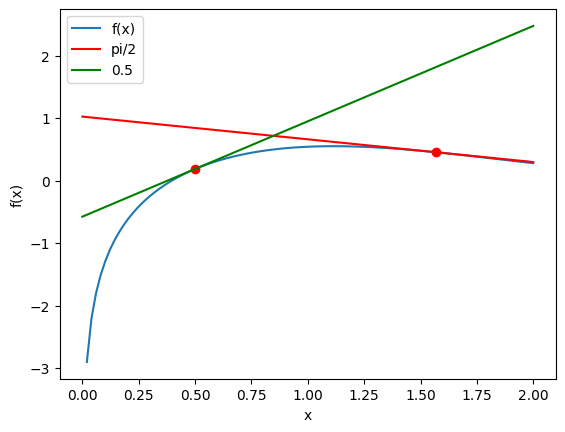

In [18]:
def f1(x):
    x = np.log(x) + np.cos(x)
    return x

# 基于极限逼近法求解函数某点导数
def derivative_at_x(f, x):
    h = 1e-5
    derivative = (f(x + h) - f(x)) / h
    return derivative


# 指定计算切线的点
x0 = torch.tensor(np.pi / 2)
x1 = torch.tensor(0.5)

# 计算该点处的导数（切线斜率）
slope_x0 = derivative_at_x(f1,x0)
slope_x1 = derivative_at_x(f1,x1)

# 计算截距 代入点截式方程
y0 = f1(x0)
y1 = f1(x1)
intercept_x0 = y0 - slope_x0 * x0
intercept_x1 = y1 - slope_x1 * x1

# 绘制函数图像
x = np.linspace(0,2, 100) 
y = f1(x)
plt.plot(x, y,label='f(x)')
plt.plot(x0, y0, 'ro')
plt.plot(x1, y1, 'ro')
plt.plot(x, slope_x0 * x + intercept_x0, 'r',label='pi/2')
plt.plot(x, slope_x1 * x + intercept_x1, 'g',label='0.5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig('./media/tangent1.png')
plt.show()


##### 法二：函数导数公式

C:\Users\41931\AppData\Local\Temp\ipykernel_29904\2176774309.py:2: RuntimeWarning: divide by zero encountered in log
  x = np.log(x) + np.cos(x)


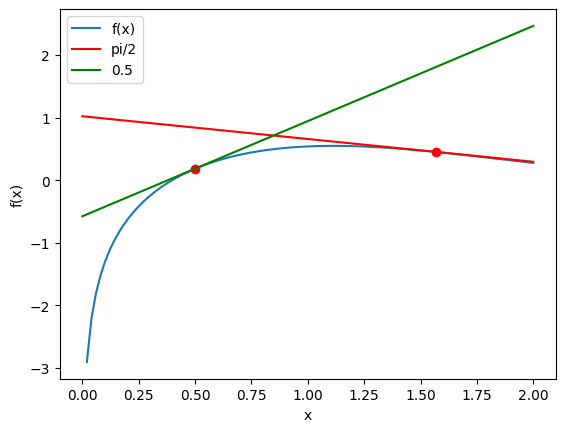

In [19]:
def f1(x):
    x = np.log(x) + np.cos(x)
    return x

# 基于导数公式法求解函数某点导数
def derivative_at_x(x):
    derivative = np.reciprocal(x) - np.sin(x)
    return derivative


# 指定计算切线的点
x0 = torch.tensor(np.pi / 2)
x1 = torch.tensor(0.5)

# 计算该点处的导数（切线斜率）
slope_x0 = derivative_at_x(x0)
slope_x1 = derivative_at_x(x1)


# 计算截距 代入点截式方程
y0 = f1(x0)
y1 = f1(x1)
intercept_x0 = y0 - slope_x0 * x0
intercept_x1 = y1 - slope_x1 * x1

# 绘制函数图像
x = np.linspace(0,2, 100)
y = f1(x)
plt.plot(x, y,label='f(x)')
plt.plot(x0, y0, 'ro')
plt.plot(x1, y1, 'ro')
plt.plot(x, slope_x0 * x + intercept_x0, 'r',label='pi/2')
plt.plot(x, slope_x1 * x + intercept_x1, 'g',label='0.5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig('./media/tangent2.png')
plt.show()

##### 法三：torch自动求导

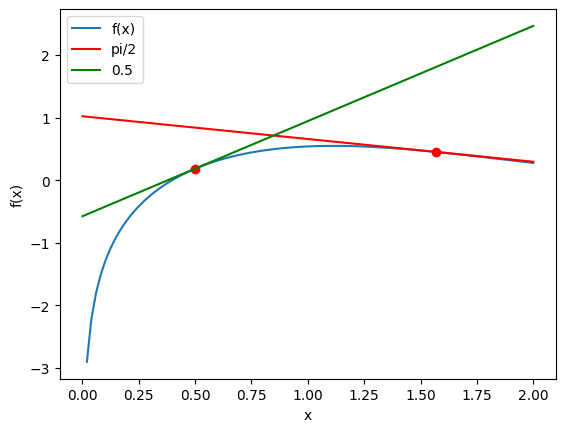

In [20]:
def f1(x):
    return torch.log(x) + torch.cos(x)

def auto_gradient(x):
    y = f1(x)
    y.backward()
    b = y - x.grad * x
    return x.grad, b


# 指定计算切线的点
x0 = torch.tensor(np.pi / 2)
x1 = torch.tensor(0.5)

# 设置开始跟踪计算图 其实本质就是保存链式法则的中间结果
x0.requires_grad = True
x1.requires_grad = True

# 计算该点处的导数（切线斜率）和切线截距
slope_x0,intercept_x0 = auto_gradient(x0)
slope_x1,intercept_x1 = auto_gradient(x1)


# 绘制函数图像
x = torch.linspace(0,2, 100)
y = f1(x)
# plt.plot(x.detach().numpy(), y.detach().numpy(),label='f(x)')
plt.plot(x, y,label='f(x)')
plt.plot(x0.detach().numpy(), y0.detach().numpy(), 'ro')
plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'ro')
plt.plot(x.numpy(), (slope_x0 * x + intercept_x0).detach().numpy(), 'r',label='pi/2')
plt.plot(x.numpy(), (slope_x1 * x + intercept_x1).detach().numpy(), 'g',label='0.5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig('./media/tangent3.png')
plt.show()
